# Quickstart

<figure style="display: table; text-align:center; margin-left: auto; margin-right:auto">
    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/simphony/docs/v4.0.0?filepath=docs%2Fintroduction%2Fquickstart.ipynb "Click to run this tutorial yourself!")
    
</figure>

<div class="admonition important">
<div class="admonition-title" style="font-weight: bold"><div style="display: inline-block">Tip</div></div>
    
Using the button above, you can launch a Jupyter notebook to follow this tutorial without even having to install SimPhoNy.
    
</div>


This tutorial offers a quick first-contact with SimPhoNy.  The learning objectives are:

- Convey the purpose of SimPhoNy
- Manage the installed ontologies
- Use the installed ontologies to instantiate ontology individuals
- Demonstrate the usage of wrappers to achieve interoperability

You will go through the workflow in the figure shown below.

![Workflow followed in the tutorial](../_static/workflow_quickstart.svg)

Following the tutorial on your own machine requires the installation of [SimPhoNy](../installation.md#installation) and the [SimLAMMPS](https://github.com/simphony/simphony-osp-simlammps) wrapper. We recommend that you use the button above to follow the tutorial online using Binder.

## Ontologies

SimPhoNy enables you to manage data that is based on ontologies. This means that all information is represented in terms of _ontology individuals_. Individuals belong to a specific _ontology class_, have specific _attributes_ and can be connected to other individuals through _relationships_. Classes, attributes and relationships are defined in ontologies. Therefore, in order for SimPhoNy to be able to properly interpret the data, such ontologies need to be installed. For that purpose, SimPhoNy includes an ontology management tool called _pico_.

In this tutorial, you will work, among others, with the SimLAMMPS wrapper. This wrapper only understands data based on the SimLAMMPS ontology, which is included with it. Therefore, you will start by installing such ontology.

_pico_ works with so-called "ontology packages". Ontology packages are just a pointer to an ontology file with some additional metadata defined on it, such as the namespaces that the ontology includes or a name for the package. You can learn to create your own packages here.

To install the desired ontology use the command `pico install` and provide the path to the ontology package.

In [1]:
# if you are running the tutorial online using Binder, then the simlammps
# ontology is already pre-installed

# otherwise, download `simlammps.ttl` and `simlammps.yml` from 
# https://github.com/simphony/simlammps/tree/v4.0.0/simphony_osp_simlammps
# and run

#!pico install simlammps.yml

_pico_ will install the ontology. After the installation is complete, it is listed among the installed ontology packages when running the `pico list` command.

In [2]:
!pico list

Packages:
	- simlammps
Namespaces:
	- simphony
	- owl
	- rdfs
	- simlammps


That's all! Everything is ready to start using SimPhoNy. 

## Data and sessions

The simplest way to start working with some data is the following.

1. Import an installed _ontology namespace_. Namespaces agglomerate the ontology classes, relationships, and attributes included in an ontology. Namespaces come bundled with ontology packages, so that one ontology package can provide several namespaces.
2. Retrieve a class from the namespace and use it to create an ontology individual.
3. Assign attributes or connect the individual with others.

In the example below, first the `simlammps` namespace from the previously installed ontology is imported, then two ontology individuals of classes _Atom_ and _Position_ are created. After that, the individual of class Atom is linked to the individual of class Position through the relationship _hasPart_, and finally some coordinates are assigned to the individual of class Position.

In [3]:
from simphony_osp.namespaces import simlammps

atom, position = simlammps.Atom(), simlammps.Position(vector=[1, 0, 3])
atom[simlammps.hasPart] = position

atom.label = "My Atom"
position.label = "My Atom's position"

SimPhoNy includes a visualization tool that can draw a graph containing any ontology individuals you desire, their attributes, and the relationships connecting them. Using it, the dataset that has just been created may be visualized.

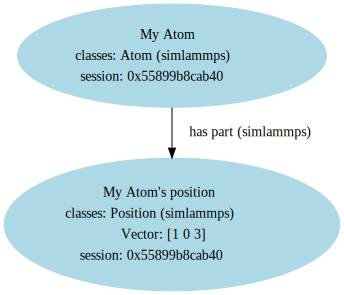

In [4]:
from simphony_osp.tools import semantic2dot

semantic2dot(atom, position)

But... Where are actually the atom and the position stored? If a new atom is created running `atom = simlammps.Atom()` again, what happens to the old atom, how can it be retrieved?

SimPhoNy stores data in the so-called _sessions_. You may think of a session as a "box" were ontology idividuals can be placed. The magic lies within the fact that sessions can provide _views_ into different data sources and software products, thanks to the SimPhoNy Wrapper mechanism. This means that you see a "box" containing ontology entitites, but behind the scenes, SimPhoNy is translating this information so that it can be used by the underlying data source or software.

But still, this does not clarify the issue. To which session did the atom and the position go? When you do not specify any session, objects are created by default on the so-called _Core Session_, which is the default session of SimPhoNy. You may access the default session at any time by importing it.

In [5]:
from simphony_osp.session import core_session

list(core_session)

[<OntologyIndividual: My Atom 63f477ea-dfc5-48c7-8227-60b71cc65cb6>,
 <OntologyIndividual: My Atom's position b9074f9e-6bd4-4eef-b8ae-78fd4d1d86cb>]

Now it is clear that the atom and its position are stored on the Core Session. Be aware that the Core Session is only meant to serve as a way to quickly test SimPhoNy or be a transient place to store information, as all of its contents are **lost** when you close the Python shell.

## Wrappers

Wrappers are sessions that are connected to data sources or other software. When you use then, you see a "box" filled with ontology entitites, but behind the scenes, they do the necessary computations to store your data on said data sources or transfer it to the software.

In this example, the SQLite (included with SimPhoNy) and [SimLAMMPS](https://github.com/simphony/simphony-osp-simlammps) wrappers are used.

First, start by creating an SQLite session. In this session, create three atoms, with their respective positions and velocities, and then commit the changes.

In [6]:
from simphony_osp.wrappers import SQLite

with SQLite('atoms.db', create=True) as session:
    
    atom = simlammps.Atom(); atom.label = 'Atom 0'
    position = simlammps.Position(vector=[1, 0, 0]); position.label = 'Position 0'
    velocity = simlammps.Velocity(vector=[0, 1, 0]); velocity.label = 'Velocity 0'
    atom[simlammps.hasPart] = {position, velocity}
    
    atom = simlammps.Atom(); atom.label = 'Atom 1'
    position = simlammps.Position(vector=[1, 0, 1]); position.label = 'Position 1'
    velocity = simlammps.Velocity(vector=[3, 1, 0]); velocity.label = 'Velocity 1'
    atom[simlammps.hasPart] = {position, velocity}
    
    atom = simlammps.Atom(); atom.label = 'Atom 2'
    position = simlammps.Position(vector=[1, 1, 0]); position.label = 'Position 2'
    velocity = simlammps.Velocity(vector=[0, 1, 2]); velocity.label = 'Velocity 2'
    atom[simlammps.hasPart] = {position, velocity}
    
    session.commit()

When the session is opened again, the atoms are still there!

In [7]:
with SQLite('atoms.db', create=False) as session:
    print(list(session))

[<OntologyIndividual: Atom 0 330dafe8-0465-440f-b36c-3a8327a06b25>, <OntologyIndividual: Position 0 bdae4880-670e-4c0d-8ade-8a2ff840fa60>, <OntologyIndividual: Velocity 0 2a630f63-e786-49e1-9ddf-125de1ef914b>, <OntologyIndividual: Atom 1 bceb1b3a-5c10-4ba5-aa0a-10499349527e>, <OntologyIndividual: Position 1 b9e812c7-8fb8-4d45-a064-fce80a6ac986>, <OntologyIndividual: Velocity 1 2cd6be8a-0b03-48f2-bb1f-3a019b665ce6>, <OntologyIndividual: Atom 2 988e2652-4c22-41fd-8471-3896553b4180>, <OntologyIndividual: Position 2 962aa585-4121-48b1-ba47-26f78092469c>, <OntologyIndividual: Velocity 2 536a16e3-4240-4414-8be2-a3a18f446e66>]


The next step is to copy these atoms to a SimLAMMPS session and run a simulation.

In [8]:
from simphony_osp.wrappers import SimLAMMPS

# open the SQLite database and create a new SimLAMMPS session
sqlite_session = SQLite('atoms.db', create=False)
simlammps_session = SimLAMMPS()

# prevent closing the sessions when leaving the contexts after 
# using the `with` statement
sqlite_session.locked = True
simlammps_session.locked = True

# copy the individuals from the SQLite session to the SimLAMMPS session
ontology_individuals_from_database = list(sqlite_session)
simlammps_session.add(ontology_individuals_from_database);

LAMMPS output is captured by PyLammps wrapper
LAMMPS (23 Jun 2022 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task


--------------------------------------------------------------------------
The library attempted to open the following supporting CUDA libraries,
but each of them failed.  CUDA-aware support is disabled.
libcuda.so.1: cannot open shared object file: No such file or directory
libcuda.dylib: cannot open shared object file: No such file or directory
/usr/lib64/libcuda.so.1: cannot open shared object file: No such file or directory
/usr/lib64/libcuda.dylib: cannot open shared object file: No such file or directory
If you are not interested in CUDA-aware support, then run with
--mca opal_warn_on_missing_libcuda 0 to suppress this message.  If you are interested
in CUDA-aware support, then try setting LD_LIBRARY_PATH to the location
of libcuda.so.1 to get passed this issue.
--------------------------------------------------------------------------


In [9]:
with simlammps_session:
    # a few additional entities that were omitted before for brevity
    # are needed to configure the simulation and are created now
    
    # material
    mass = simlammps.Mass(value=0.2)
    material = simlammps.Material()
    material[simlammps.hasPart] += mass
    for atom in simlammps_session.get(oclass=simlammps.Atom):
        atom[simlammps.hasPart] += material
    
    # simulation box
    box = simlammps.SimulationBox()
    face_x = simlammps.FaceX(vector=(10, 0, 0))
    face_x[simlammps.hasPart] += simlammps.Periodic()
    face_y = simlammps.FaceY(vector=(0, 10, 0))
    face_y[simlammps.hasPart] += simlammps.Periodic()
    face_z = simlammps.FaceZ(vector=(0, 0, 10))
    face_z[simlammps.hasPart] += simlammps.Periodic()
    box[simlammps.hasPart] += {face_x, face_y, face_z}
    
    # molecular dynamics model
    md_nve = simlammps.MolecularDynamics()

    # solver component
    sp = simlammps.SolverParameter()

    # integration time
    steps = 100
    itime = simlammps.IntegrationTime(steps=steps)
    sp[simlammps.hasPart] += itime
    
    # verlet
    verlet = simlammps.Verlet()
    sp[simlammps.hasPart] += verlet

    # define the interatomic force as material relation
    lj = simlammps.LennardJones612(
        cutoffDistance=2.5, energyWellDepth=1.0, vanDerWaalsRadius=1.0
    )
    lj[simlammps.hasPart] += material

In [10]:
# the simulation is now ready to be run
simlammps_session.compute()

After running the simulation, the data in the SQLite database can be overwritten with the new data.

In [11]:
# finally, the data in the sqlite database can be overwritten
# with the new data
sqlite_session.add(
    simlammps_session,
    exists_ok=True,
    merge=False,  # overwrite an entity if it already exists
)
sqlite_session.commit()

# and both sessions can be closed
sqlite_session.close(), simlammps_session.close();

As expected, if the saved atoms are now examined, their positions and velicities have changed.

In [12]:
with SQLite('atoms.db', create=False) as session:
    for i, atom in enumerate(session.get(oclass=simlammps.Atom)):
        velocity = atom.get(oclass=simlammps.Velocity).one()
        position = atom.get(oclass=simlammps.Position).one()
        print(
            f"{atom.label}:\n"
            f"  - Position {position.vector}\n"
            f"  - Velocity {velocity.vector}"
        )

Atom 0:
  - Position [1.09604332 9.98007699 9.56039398]
  - Velocity [ 0.36107337  0.40331728 -0.30807669]
Atom 1:
  - Position [2.23711536 0.99949841 1.09814967]
  - Velocity [ 2.68929927  1.9921991  -0.5872734 ]
Atom 2:
  - Position [1.16684132 1.5204246  1.34145635]
  - Velocity [-0.05037264  0.60448362  2.89535009]


That's all! This was just a quick overview of the usage and purpose of SimPhoNy. Keep reading the documentation to learn more.